In [1]:
'''ОЧЕНЬ ИНТЕРЕСНЫЙ УРОК ПО ОБУЧЕНИЮ СОБСТВЕННОЙ МОДЕЛИ'''

#https://www.youtube.com/watch?v=zqcIjDLxZIM Основы Python для Data Science от Skillbox


#https://pjreddie.com/media/files/mnist_train.csv датасет для тренировки модели данных
#https://pjreddie.com/media/files/mnist_test.csv датасет для тестирования долеи данных

import numpy as np #импортируем модуль NumPy

matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
                  ])
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


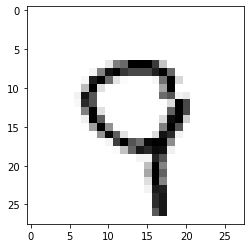

In [2]:
import pandas as pd #импортируем модуль pandas
test_data = pd.read_csv("mnist_test.csv", header = None)

import matplotlib.pyplot as plt #импортируем модуль matplotlib

image_row = test_data.values[235, 1:] # берем любую строчку без первого столбца
image_matrix = image_row.reshape(28, 28) # решейпим нашу цифровую строку в матрицу
plt.imshow(image_matrix, cmap="Greys") #рисуем нашу матрицу, cmap - color map

In [3]:
train_data = pd.read_csv("mnist_train.csv", header = None)
test_data = pd.read_csv("mnist_test.csv", header = None)
print (test_data.shape) #1 столбец для label, все остальные (28*28 = 784) - код картинки
print (train_data.shape)

cols = ["label"]
for i in range(784):
    cols.append("px_{}".format(i+1))

train_data.columns = cols
test_data.columns = cols

from sklearn.neighbors import KNeighborsClassifier #импортируем модель по алгоритму БЛИЖАЙШИХ СОСЕДЕЙ
train_values = train_data.values[:, 1:]
test_values = test_data.values[:, 1:]

train_label = train_data.values[:, 0]
test_label = test_data.values[:, 0]

print(train_values.shape, test_values.shape)
print(train_label.shape, test_label.shape)

(10000, 785)
(60000, 785)
(60000, 784) (10000, 784)
(60000,) (10000,)


In [4]:
kn_classifier = KNeighborsClassifier(n_jobs=-1) #для работы на нескольких ядрах для ускорения
kn_classifier = kn_classifier.fit(train_values, train_label) #тренируем модель по алгоритму БЛИЖАЙШИХ СОСЕДЕЙ

На рисунке представлена цифра 6


array([6], dtype=int64)

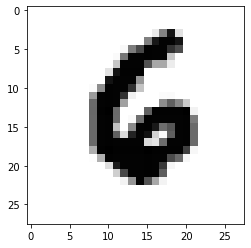

In [5]:
test_id = 130 #любой номер числа, которое хотим проверить

plt.imshow(test_values[test_id, :].reshape(28,28), cmap= "Greys")
print("На рисунке представлена цифра {}".format(test_label[test_id]))

kn_classifier.predict(test_values[test_id, :].reshape(1, 784)) #обученная модель определяет число по картинке

In [6]:
from sklearn.metrics import accuracy_score #импортируем модуль для проверки точности модели

kn_predictions = kn_classifier.predict(test_values) #собираем ВСЕ предикты по нашей тестовой матрице

In [7]:
accuracy_score(test_label, kn_predictions) #оцениваем точность нашей модели

0.9688

In [8]:
from sklearn.neural_network import MLPClassifier #импортируем модуль НЕЙРОННОЙ СЕТИ
mlp_classifier = MLPClassifier(verbose = True) # включаем режим пояснения операций во время тренировки модели
mlp_classifier = mlp_classifier.fit(train_values, train_label)

Iteration 1, loss = 6.20325178
Iteration 2, loss = 0.75114261
Iteration 3, loss = 0.43072892
Iteration 4, loss = 0.31320697
Iteration 5, loss = 0.24370407
Iteration 6, loss = 0.20546593
Iteration 7, loss = 0.17965084
Iteration 8, loss = 0.15774829
Iteration 9, loss = 0.14676477
Iteration 10, loss = 0.13676108
Iteration 11, loss = 0.12839992
Iteration 12, loss = 0.11883341
Iteration 13, loss = 0.11815275
Iteration 14, loss = 0.11645560
Iteration 15, loss = 0.10581313
Iteration 16, loss = 0.11266290
Iteration 17, loss = 0.10617052
Iteration 18, loss = 0.09498615
Iteration 19, loss = 0.08960112
Iteration 20, loss = 0.09568943
Iteration 21, loss = 0.10009064
Iteration 22, loss = 0.08555441
Iteration 23, loss = 0.08978295
Iteration 24, loss = 0.08333235
Iteration 25, loss = 0.07277445
Iteration 26, loss = 0.07625730
Iteration 27, loss = 0.06824298
Iteration 28, loss = 0.07138133
Iteration 29, loss = 0.07166007
Iteration 30, loss = 0.07063943
Iteration 31, loss = 0.07176752
Iteration 32, los

На рисунке представлена цифра 9


array([9], dtype=int64)

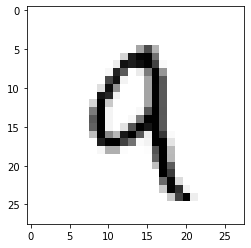

In [9]:
test_id = 125 #любой номер числа, которое хотим проверить

plt.imshow(test_values[test_id, :].reshape(28,28), cmap= "Greys")
print("На рисунке представлена цифра {}".format(test_label[test_id]))

mlp_classifier.predict(test_values[test_id, :].reshape(1, 784)) #обученная модель НЕЙРОННОЙ СЕТИ определяет число по картинке

In [10]:
mlp_predictions = mlp_classifier.predict(test_values) #собираем ВСЕ предикты по нашей тестовой матрице
accuracy_score(test_label, mlp_predictions) #оцениваем точность нашей НЕЙРОННОЙ СЕТИ

0.9632

In [14]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/watch?v=zqcIjDLxZIM" frameboarder="0" allowfullscreen></iframe>